In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

### Target system identified using cumulative Kepler data and located in MAST archive

# Demonstration of Raw Light Curve Plotting

This demo is built off the tutorial code provided aby NASA at "https://github.com/spacetelescope/notebooks/tree/master/notebooks/MAST/K2/K2_Lightcurve "

A light curve is a plot of flux versus time, and is used to identify variability, including the transits of orbiting companions like planets. The light curve observed here is the Kepler-227 system (Kepler ID: 10797460). This system contains two planets orbiting a star. Further information about it and linked publications are available at "https://exoplanetarchive.ipac.caltech.edu/overview/K00752.01 "

This tutorial will refer to a couple K2-related terms that we define here.

* Campaign = During the K2 mission, the Kepler telescope observed the sky in a given pointing along the ecliptic plane for approximately 80 days at a time. Each of these regions is referred to as a "Campaign", starting with Campaign 0 and ending with Campaign 19. There was also a special "Engineering" Campaign before Campaign 0 that lasted ~10 days.
* HDU = Header Data Unit. A FITS file is made up of HDUs that contain data and metadata relating to the file. The first HDU is called the primary HDU, and anything that follows is considered an "extension", e.g., "the first FITS extension", "the second FITS extension", etc.
* BJD = Barycentric Julian Date, the Julian Date that has been corrected for differences in the Earth's position with respect to the Solar System center of mass.
* BKJD = Barycentric Kepler Julian Date, the timestamp measured in BJD, but offset by 2454833.0. I.e., BKJD = BJD - 2454833.0
* WCS = World Coordinate System, A FITS convention used to store coordinate information inside FITS headers. For K2 full frame images, it is used to provide the translation needed to go from pixel coorindates to celestial coordinates in right ascension and declination.
* SAP Flux = Simple Aperture Photometry flux, the flux after summing the calibrated pixels within the K2 optimal photometric aperture.
* PDCSAP Flux = Pre-search Data Conditioned Simple Aperture Photometry, the SAP flux values nominally corrected for instrumental variations. Thus, these fluxes are the mission's best estimate of the intrinsic variability of the target.

In [2]:
fits_file = "https://mast.stsci.edu/api/v0.1/Download/file?uri=mast:Kepler/url/missions/kepler/lightcurves/0089/008960890//kplr008960890-2013131215648_llc.fits"
fits.info(fits_file)

Filename: C:\Users\Bartek Skica\.astropy\cache\download\url\4b7a8a4068bbb5bfa3f10ebbd8825ba4\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   1556R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (5, 4)   int32   


In [3]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [4]:
# Store timestamps and fluxes to an array
with fits.open(fits_file, mode="readonly") as hdulist:    
    k2_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

### Plotting the Light Curve

In [5]:
# Setting plot parameters
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5.5
plt.rcParams['ytick.major.size'] = 5.5


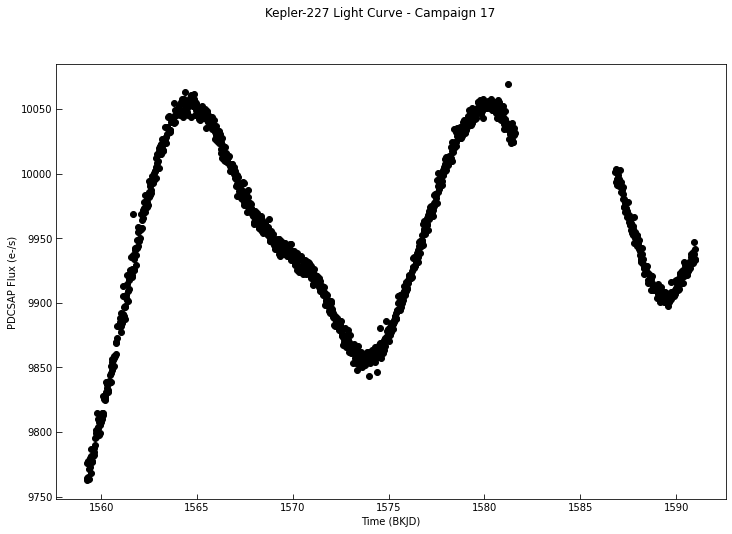

In [6]:
# Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
ax.plot(k2_bjds, pdcsap_fluxes, 'ko')

# Label the graph
fig.suptitle("Kepler-227 Light Curve - Campaign 17")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (BKJD)")

plt.show()

### Identifying Data Outliers 

Lightcurve data also includes quality flags for each measurement. These were identified by the Kepler pipeline, separated into various categoried of spacecraft noise, operation modes, maneuvers, cosmic ray interference, etc. 

In [7]:
with fits.open(fits_file, mode="readonly") as hdulist:
    qual_flags = hdulist[1].data['SAP_QUALITY']

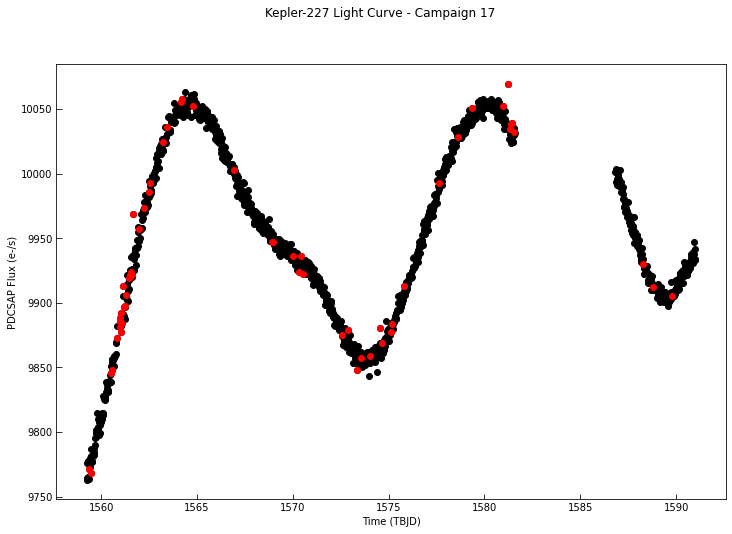

In [8]:
# Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
ax.plot(k2_bjds, pdcsap_fluxes, 'ko')

# Locate quality flags greater than zero.
where_gt0 = np.where(qual_flags > 0)[0]

# Overplot the fluxes with quality flags greater than zero in red.
ax.plot(k2_bjds[where_gt0], pdcsap_fluxes[where_gt0], 'ro')

# Label the axes and define a title for the figure.
fig.suptitle("Kepler-227 Light Curve - Campaign 17")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")
plt.show()